In [1]:
%pylab inline
%matplotlib inline

import sys
import os
import pickle
import math


sys.path.append("/Users/Bya/git/predictEPL/config/")
sys.path.append("/Users/Bya/git/predictEPL/utils/")
sys.path.append("/Users/Bya/git/predictEPL/WebScrapping/")


import paths
import names
import tokenizer
import useful_methods
import my_plot
import scrap_espn_gamecast
import espn_urls
import result_analyzer
import emolex

Populating the interactive namespace from numpy and matplotlib


### Read Single Game

In [17]:
week = '13'
team_home = 'City'
team_away = 'Liverpool'

dfSingle = useful_methods.SingleGameDf(week, team_home, team_away, filtering=True, retweet=False)
dfSingle.describe()

,date,ith_minute,side,status,tags,text,text_status,user,user_status
count,23235,23235,23235,23235,23235,23235,23235,23235,23235
unique,5343,108,3,2,3159,22806,1,13159,1
top,Sat Nov 21 18:03:27 +0000 2015,34,away,tweet,lfc,Get in #LFC,normal,lfc,normal
freq,31,1178,17928,21921,12107,13,23235,53,23235


### Classifiers

In [18]:
# Read Naive Bayes Classifier
os.chdir("/Users/Bya/Dropbox/Research/datas/Detecter/")
with open('nb_tweets_sentiment_detector(hash_emolex).pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'utf-8'
    nb_detector_reloaded = u.load()

classifier = nb_detector_reloaded

AttributeError: Can't get attribute 'tokenizer' on <module 'useful_methods' from '/Users/Bya/git/predictEPL/utils/useful_methods.py'>

### Emolex Plot

In [3]:
%time dic_emolex_soccer, dic_emolex_stemmed_soccer = emolex.EmolexSoccerDic()

All Words: 14152
CPU times: user 7.28 s, sys: 35.1 ms, total: 7.32 s
Wall time: 7.36 s


In [9]:
# Scrap Gamecast
url = espn_urls.MatchUrl('GW' + str(week), team_home + '_vs_' + team_away + '.csv')
dfGameCast = scrap_espn_gamecast.CreateEspnLiveCommentDF(url)

# Create Goal, Attack, Foul dics
%time goals_dic, attacks_dic_home, attacks_dic_away, fouls_dic_home, fouls_dic_away = scrap_espn_gamecast.CreateGAFdics(dfGameCast)

[Match]: Manchester City VS Liverpool
[Scrap Done]: 31.83 sec
CPU times: user 9.63 ms, sys: 128 µs, total: 9.76 ms
Wall time: 9.8 ms


In [4]:
dfEmolexHome = emolex.CreateEmolexDF(dfSingle[(dfSingle['side'] == 'home')], dic_emolex_soccer, dic_emolex_stemmed_soccer)
dfEmolexAway = emolex.CreateEmolexDF(dfSingle[(dfSingle['side'] == 'away')], dic_emolex_soccer, dic_emolex_stemmed_soccer)

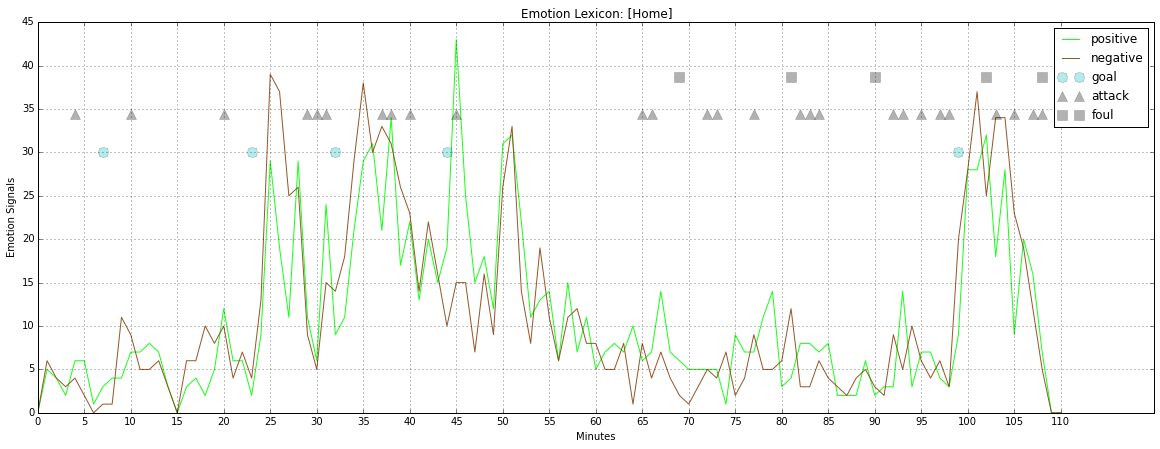

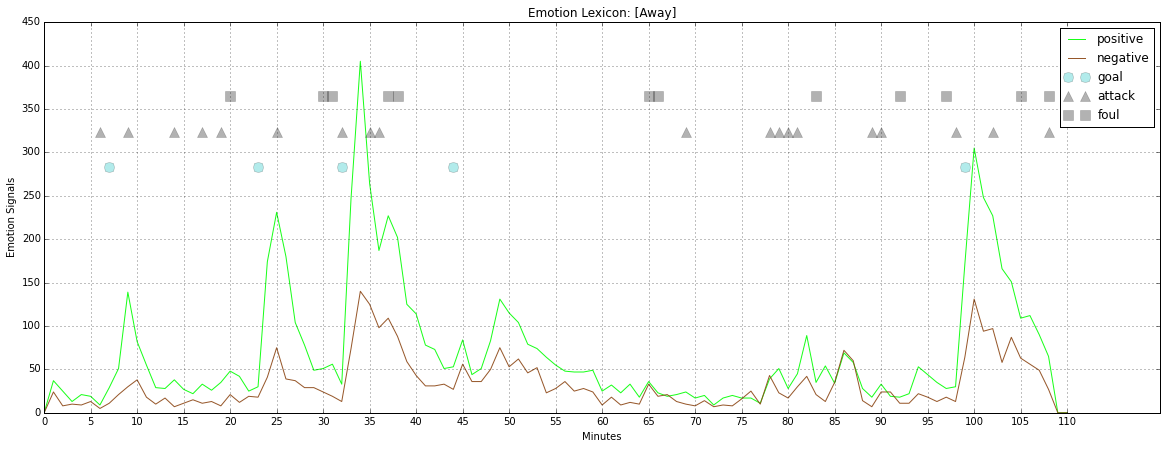

In [16]:
my_plot.EmolexCats(dfEmolexHome, ['positive', 'negative'], goals_dic, attacks_dic_home, fouls_dic_home, 'Home')
my_plot.EmolexCats(dfEmolexAway, ['positive', 'negative'], goals_dic, attacks_dic_away, fouls_dic_away, 'Away')